## Downloading libraries

In [122]:
!pip install wordcloud

## Importing libraries

In [123]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [124]:
import nltk
nltk.download('punkt')
from nltk import wordpunct_tokenize
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package punkt to C:\Users\Jonathan
[nltk_data]     Oliva\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Jonathan
[nltk_data]     Oliva\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [125]:
import os
print(os.listdir())

['.git', '.ipynb_checkpoints', 'dataset', 'LICENSE', 'README.md', 'wordcloud1.jpg', 'wordcloud_demostration.ipynb']


In [126]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from PIL import Image

## Downloading data

In [127]:
mydata = "dataset"

In [128]:
print(os.listdir(mydata))

['dnd-spells.csv', 'dnd.png']


In [129]:
df_dataset = pd.read_csv(mydata+"/dnd-spells.csv")

In [130]:
df_dataset[:5]

,name,classes,level,school,cast_time,range,duration,verbal,somatic,material,material_cost,description
0,Acid Splash,"Artificer, Sorcerer, Wizard",0,Conjuration,1 Action,60 Feet,Instantaneous,1,1,0,NaN,You hurl a bubble of acid. Choose one creature...
1,Blade Ward,"Bard, Sorcerer, Warlock, Wizard",0,Abjuration,1 Action,Self,1 round,1,1,0,NaN,You extend your hand and trace a sigil of ward...
2,Booming Blade,"Artificer, Sorcerer, Warlock, Wizard",0,Evocation,1 Action,Self (5-foot radius),1 round,0,1,1,a melee weapon worth at least 1 sp,You brandish the weapon used in the spell’s ca...
3,Chill Touch,"Sorcerer, Warlock, Wizard",0,Necromancy,1 Action,120 Feet,1 round,1,1,0,NaN,"You create a ghostly, skeletal hand in the spa..."
4,Control Flames,"Druid, Sorcerer, Wizard",0,Transmutation,1 Action,60 Feet,Instantaneous or 1 hour,0,1,0,NaN,You choose nonmagical flame that you can see w...


## Preprocessing Data

### Eliminate, if exist,  null values in description

In [131]:
def calcData(row):
    counter = 0
    for element in row:
        if element == True:
            counter+=1
    return counter

In [132]:
df_dataset.isnull().apply(lambda x: calcData(x))

name               0
classes            0
level              0
school             0
cast_time          0
range              0
duration           0
verbal             0
somatic            0
material           0
material_cost    264
description        0
dtype: int64

### Eliminate, if exist, duplicate values in description 

In [133]:
sum(df_dataset.duplicated('description'))

0

### Creating Dataset 

In [134]:
stopwords_english = set(stopwords.words('english'))

In [135]:
len(stopwords_english)

179

In [136]:
def createCloudUnigrams(x):
    y = nltk.word_tokenize(x)
    
    return [word for word in y if not word in stopwords_english and word.isalnum()]
    

In [137]:
df_dataset['unigrams'] = df_dataset.apply(lambda x: createCloudUnigrams(x['description']),axis=1)

In [138]:
df_dataset['unigrams'][:5]

0    [You, hurl, bubble, acid, Choose, one, creatur...
1    [You, extend, hand, trace, sigil, warding, air...
2    [You, brandish, weapon, used, spell, casting, ...
3    [You, create, ghostly, skeletal, hand, space, ...
4    [You, choose, nonmagical, flame, see, within, ...
Name: unigrams, dtype: object

In [139]:
unigrams = df_dataset['unigrams']
cloud_set = {}

for terms in unigrams:
    counter = 0
    for term in terms:
        cloud_set[term] = cloud_set.get(term,0) + 1

In [145]:
dict(list(cloud_set.items())[:10])

{'You': 660,
 'hurl': 9,
 'bubble': 1,
 'acid': 37,
 'Choose': 56,
 'one': 379,
 'creature': 1298,
 'within': 603,
 'range': 359,
 'choose': 187}

## Generating Wordcloud

In [141]:
# getting figure
tweet_mask = np.array(Image.open(mydata + "/dnd.png"))

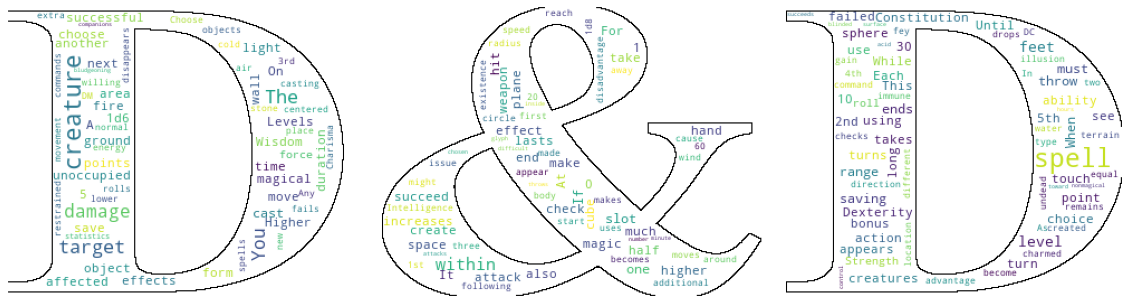

In [142]:
wc = WordCloud(background_color="white", mask=tweet_mask,contour_width=1)
wc.generate_from_frequencies(cloud_set)
plt.figure( figsize=(20,20))
plt.imshow(wc)
plt.axis("off")
plt.show()